# Policy Gradient 
- Name: Bidit Sadhukhan
- Reg.No- B2230022
- RL code assignment-2



### Original Implementation

In [27]:
import gym 
import numpy as np
import matplotlib.pyplot as plt

In [28]:
env = gym.make('CartPole-v1')

c:\Users\BIDIT\anaconda3\Lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\BIDIT\anaconda3\Lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [29]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [30]:
env.action_space

Discrete(2)

In [31]:
import numpy as np

class LogisticPolicy:
    
    def __init__(self, θ, α, γ):
        # Initialize paramters θ, learning rate α and discount factor γ
        
        self.θ = θ
        self.α = α
        self.γ = γ
        
    def logistic(self, y):
        # definition of logistic function
        
        return 1/(1 + np.exp(-y))
    
    def probs(self, x):
        # returns probabilities of two actions
        
        y = x @ self.θ
        prob0 = self.logistic(y)
        
        return np.array([prob0, 1-prob0])        
    
    def act(self, x):
        # sample an action in proportion to probabilities
        
        probs = self.probs(x)
        action = np.random.choice([0, 1], p=probs)
        
        return action, probs[action]

    def grad_log_p(self, x):
        # calculate grad-log-probs
        
        y = x @ self.θ        
        grad_log_p0 = x - x*self.logistic(y)
        grad_log_p1 = - x*self.logistic(y)
        
        return grad_log_p0, grad_log_p1
        
    def grad_log_p_dot_rewards(self, grad_log_p, actions, discounted_rewards):
        # dot grads with future rewards for each action in episode
        
        return grad_log_p.T @ discounted_rewards
    
    def discount_rewards(self, rewards):
        # calculate temporally adjusted, discounted rewards
        
        discounted_rewards = np.zeros(len(rewards))
        cumulative_rewards = 0
        for i in reversed(range(0, len(rewards))):
            cumulative_rewards = cumulative_rewards * self.γ + rewards[i]
            discounted_rewards[i] = cumulative_rewards
            
        return discounted_rewards

    def update(self, rewards, obs, actions):
        # calculate gradients for each action over all observations
        grad_log_p = np.array([self.grad_log_p(ob)[action] for ob,action in zip(obs,actions)])
        
        assert grad_log_p.shape == (len(obs), 4)
        
        # calculate temporaly adjusted, discounted rewards
        discounted_rewards = self.discount_rewards(rewards)
        
        # gradients times rewards
        dot = self.grad_log_p_dot_rewards(grad_log_p, actions, discounted_rewards)
        
        # gradient ascent on parameters
        self.θ += self.α*dot

In [32]:
def run_episode(env, policy, render=False):
    
    observation = env.reset()
    totalreward = 0
    
    observations = []
    actions = []
    rewards = []
    probs = []
    
    done = False
    
    while not done:
        if render:
            env.render()
        
        observations.append(observation)
        
        action, prob = policy.act(observation)
        observation, reward, done, info = env.step(action)
        
        totalreward += reward
        rewards.append(reward)
        actions.append(action)
        probs.append(prob)
    
    return totalreward, np.array(rewards), np.array(observations), np.array(actions), np.array(probs)

In [33]:
from gym.wrappers import RecordVideo
def train(θ, α, γ, Policy, MAX_EPISODES=1000, seed=None, evaluate=False):
    
    # initialize environment and policy
    env = gym.make('CartPole-v1')
    if seed is not None:
        env.seed(seed)
    episode_rewards = []
    policy = Policy(θ, α, γ)
    
    # train until MAX_EPISODES
    for i in range(MAX_EPISODES):

        # run a single episode
        total_reward, rewards, observations, actions, probs = run_episode(env, policy)
                
        # keep track of episode rewards
        episode_rewards.append(total_reward)
        
        # update policy
        policy.update(rewards, observations, actions)
        print("EP: " + str(i) + " Score: " + str(total_reward) + " ",end="\r", flush=False) 

    # evaluation call after training is finished - evaluate last trained policy on 100 episodes
    if evaluate:
        env = RecordVideo(env, 'pg_cartpole_original/')
        for _ in range(100):
            run_episode(env, policy, render=False)
        env.env.close()
        
    return episode_rewards, policy

In [34]:
# additional imports for saving and loading a trained policy
# import Monitor, load_results

# for reproducibility
GLOBAL_SEED = 0
np.random.seed(GLOBAL_SEED)

episode_rewards, policy = train(θ=np.random.rand(4),
                                α=0.002,
                                γ=0.99,
                                Policy=LogisticPolicy,
                                MAX_EPISODES=2000,
                                seed=GLOBAL_SEED,
                                evaluate=True)

c:\Users\BIDIT\anaconda3\Lib\site-packages\gym\core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
c:\Users\BIDIT\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


c:\Users\BIDIT\anaconda3\Lib\site-packages\gym\wrappers\monitoring\video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
c:\Users\BIDIT\anaconda3\Lib\site-packages\gym\core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


In [35]:
print("Variance:",np.var(episode_rewards))

Variance: 30796.931847750002


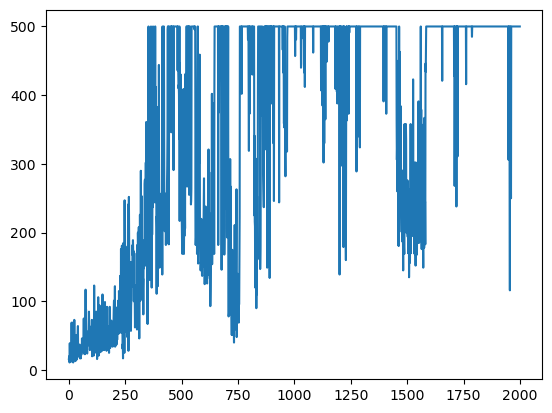

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(episode_rewards)

In [13]:
import glob

files = glob.glob(f'pg_cartpole_original/rl-video-episode-*.mp4')

files

['pg_cartpole\\rl-video-episode-0.mp4',
 'pg_cartpole\\rl-video-episode-1.mp4',
 'pg_cartpole\\rl-video-episode-27.mp4',
 'pg_cartpole\\rl-video-episode-64.mp4',
 'pg_cartpole\\rl-video-episode-8.mp4']

In [14]:
from IPython.display import Video

Video(files[0], embed=True)

### My implementation 
- With Baseline Reduction
- With Advantage Function

In [37]:
import gym
print(gym.__version__)
import numpy as np
import matplotlib.pyplot as plt

0.25.2


In [38]:
env = gym.make('CartPole-v1')

c:\Users\BIDIT\anaconda3\Lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\BIDIT\anaconda3\Lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [39]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [40]:
env.action_space

Discrete(2)

In [52]:
class LogisticPolicy:
    
    def __init__(self, θ, α, γ):
        # Initialize paramters θ, learning rate α and discount factor γ
        
        self.θ = θ
        self.α = α
        self.γ = γ
        
    def logistic(self, y):
        # definition of logistic function
        
        return 1/(1 + np.exp(-y))
    
    def probs(self, x):
        # returns probabilities of two actions
        
        y = x @ self.θ
        prob0 = self.logistic(y)
        
        return np.array([prob0, 1-prob0])        
    
    def act(self, x):
        # sample an action in proportion to probabilities
        
        probs = self.probs(x)
        action = np.random.choice([0, 1], p=probs)
        
        return action, probs[action]

    def grad_log_p(self, x):
        # calculate grad-log-probs
        
        y = x @ self.θ        
        grad_log_p0 = x - x*self.logistic(y)
        grad_log_p1 = - x*self.logistic(y)
        
        return grad_log_p0, grad_log_p1
        
    def grad_log_p_dot_rewards(self, grad_log_p, actions, discounted_rewards):
        # dot grads with future rewards for each action in episode
        
        return grad_log_p.T @ discounted_rewards
    

    def discount_rewards(self, rewards, obs):
    # calculate temporally adjusted, discounted rewards with baseline adjustment

        discounted_rewards = np.zeros(len(rewards))
        cumulative_rewards = 0

    # Calculate state values
        state_values = self.get_state_values(obs)

        for i in reversed(range(0, len(rewards))):
            cumulative_rewards = cumulative_rewards * self.γ + rewards[i] - state_values[i]
            discounted_rewards[i] = cumulative_rewards

        return discounted_rewards

    
    def get_state_values(self, obs):
        # Calculate state values using a linear function
        # obs is a numpy array of observations
        state_values = np.zeros(len(obs))
        for i, ob in enumerate(obs):
            state_values[i] = ob @ self.θ
        return state_values

    def update(self, rewards, obs, actions):
        # calculate gradients for each action over all observations
        grad_log_p = np.array([self.grad_log_p(ob)[action] for ob,action in zip(obs,actions)])
        
        assert grad_log_p.shape == (len(obs), 4)
        
        # calculate temporaly adjusted, discounted rewards
        discounted_rewards = self.discount_rewards(rewards,obs)
        
        # gradients times rewards
        dot = self.grad_log_p_dot_rewards(grad_log_p, actions, discounted_rewards)
        
        # gradient ascent on parameters
        self.θ += self.α*dot


In [54]:
def run_episode(env, policy, render=False):
    
    observation = env.reset()
    totalreward = 0
    
    observations = []
    actions = []
    rewards = []
    probs = []
    
    done = False
    
    while not done:
        if render:
            env.render()
        
        observations.append(observation)
        
        action, prob = policy.act(observation)
        observation, reward, done, info = env.step(action)
        
        totalreward += reward
        rewards.append(reward)
        actions.append(action)
        probs.append(prob)
    
    return totalreward, np.array(rewards), np.array(observations), np.array(actions), np.array(probs)

In [43]:
from gym.wrappers import RecordVideo
def train(θ, α, γ, Policy, MAX_EPISODES=1000, seed=None, evaluate=False):
    
    # initialize environment and policy
    env = gym.make('CartPole-v1')
    if seed is not None:
        env.reset(seed=seed)
    episode_rewards = []
    policy = Policy(θ, α, γ)
    
    # train until MAX_EPISODES
    for i in range(MAX_EPISODES):

        # run a single episode
        total_reward, rewards, observations, actions, probs = run_episode(env, policy)
                
        # keep track of episode rewards
        episode_rewards.append(total_reward)
        
        # update policy
        policy.update(rewards, observations, actions)
        print("EP: " + str(i) + " Score: " + str(total_reward) + " ",end="\r", flush=False) 

    # evaluation call after training is finished - evaluate last trained policy on 100 episodes
    if evaluate:
        env = RecordVideo(env, 'pg_cartpole_mine/')
        for _ in range(100):
            run_episode(env, policy, render=False)
        env.env.close()
        
    return episode_rewards, policy

In [55]:
# additional imports for saving and loading a trained policy
# import Monitor, load_results

# for reproducibility
GLOBAL_SEED = 0
np.random.seed(GLOBAL_SEED)

episode_rewards_1, policy = train(θ=np.random.rand(4),
                                α=0.002,
                                γ=0.9,
                                Policy=LogisticPolicy,
                                MAX_EPISODES=2000,
                                seed=GLOBAL_SEED,
                                evaluate=True)

In [56]:
print("Variance:",np.var(episode_rewards_1))

Variance: 12943.391319000002


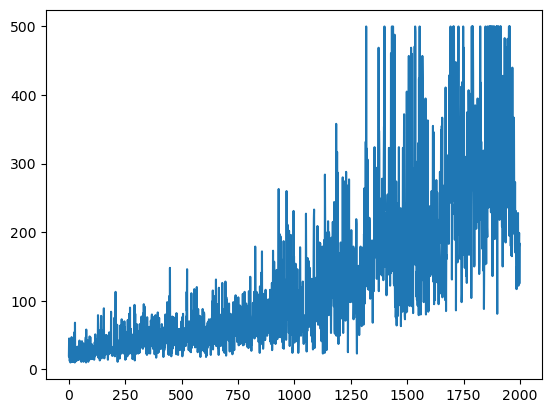

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(episode_rewards_1)

In [47]:
import glob

files = glob.glob(f'pg_cartpole_mine/rl-video-episode-*.mp4')

files

['pg_cartpole_mine\\rl-video-episode-0.mp4',
 'pg_cartpole_mine\\rl-video-episode-1.mp4',
 'pg_cartpole_mine\\rl-video-episode-27.mp4',
 'pg_cartpole_mine\\rl-video-episode-64.mp4',
 'pg_cartpole_mine\\rl-video-episode-8.mp4']

In [51]:
from IPython.display import Video

Video(files[2], embed=True)

#### With Advantage Function

In [ ]:
import gym
print(gym.__version__)
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
env = gym.make('CartPole-v1')

In [ ]:
env.observation_space

In [ ]:
env.action_space

In [ ]:
class LogisticPolicy:
    
    def __init__(self, θ, α, γ):
        # Initialize paramters θ, learning rate α and discount factor γ
        
        self.θ = θ
        self.α = α
        self.γ = γ
        
    def logistic(self, y):
        # definition of logistic function
        
        return 1/(1 + np.exp(-y))
    
    def probs(self, x):
        # returns probabilities of two actions
        
        y = x @ self.θ
        prob0 = self.logistic(y)
        
        return np.array([prob0, 1-prob0])        
    
    def act(self, x):
        # sample an action in proportion to probabilities
        
        probs = self.probs(x)
        action = np.random.choice([0, 1], p=probs)
        
        return action, probs[action]

    def grad_log_p(self, x):
        # calculate grad-log-probs
        
        y = x @ self.θ        
        grad_log_p0 = x - x*self.logistic(y)
        grad_log_p1 = - x*self.logistic(y)
        
        return grad_log_p0, grad_log_p1
        
    def grad_log_p_dot_rewards(self, grad_log_p, actions, discounted_rewards):
        # dot grads with future rewards for each action in episode
        
        return grad_log_p.T @ discounted_rewards
    

    def discount_rewards(self, rewards, obs):
    # calculate temporally adjusted, discounted rewards with baseline adjustment

        discounted_rewards = np.zeros(len(rewards))
        cumulative_rewards = 0

    # Calculate state values
        state_values = self.get_state_values(obs)

        for i in reversed(range(0, len(rewards))):
            cumulative_rewards = cumulative_rewards * self.γ + rewards[i] - state_values[i]
            discounted_rewards[i] = cumulative_rewards

        return discounted_rewards

    
    def get_state_values(self, obs):
        # Calculate state values using a linear function
        # obs is a numpy array of observations
        state_values = np.zeros(len(obs))
        for i, ob in enumerate(obs):
            state_values[i] = ob @ self.θ
        return state_values

    def update(self, rewards, obs, actions):
        # calculate gradients for each action over all observations
        grad_log_p = np.array([self.grad_log_p(ob)[action] for ob,action in zip(obs,actions)])
        
        assert grad_log_p.shape == (len(obs), 4)
        
        # calculate temporaly adjusted, discounted rewards
        discounted_rewards = self.discount_rewards(rewards,obs)
        
        # gradients times rewards
        dot = self.grad_log_p_dot_rewards(grad_log_p, actions, discounted_rewards)
        
        # gradient ascent on parameters
        self.θ += self.α*dot


In [ ]:
def run_episode(env, policy, render=False):
    
    observation = env.reset()
    totalreward = 0
    
    observations = []
    actions = []
    rewards = []
    probs = []
    
    done = False
    
    while not done:
        if render:
            env.render()
        
        observations.append(observation)
        
        action, prob = policy.act(observation)
        observation, reward, done, info = env.step(action)
        
        totalreward += reward
        rewards.append(reward)
        actions.append(action)
        probs.append(prob)
    
    return totalreward, np.array(rewards), np.array(observations), np.array(actions), np.array(probs)

In [ ]:
from gym.wrappers import RecordVideo
def train(θ, α, γ, Policy, MAX_EPISODES=1000, seed=None, evaluate=False):
    
    # initialize environment and policy
    env = gym.make('CartPole-v1')
    if seed is not None:
        env.reset(seed=seed)
    episode_rewards = []
    policy = Policy(θ, α, γ)
    
    # train until MAX_EPISODES
    for i in range(MAX_EPISODES):

        # run a single episode
        total_reward, rewards, observations, actions, probs = run_episode(env, policy)
                
        # keep track of episode rewards
        episode_rewards.append(total_reward)
        
        # update policy
        policy.update(rewards, observations, actions)
        print("EP: " + str(i) + " Score: " + str(total_reward) + " ",end="\r", flush=False) 

    # evaluation call after training is finished - evaluate last trained policy on 100 episodes
    if evaluate:
        env = RecordVideo(env, 'pg_cartpole_mine_1/')
        for _ in range(100):
            run_episode(env, policy, render=False)
        env.env.close()
        
    return episode_rewards, policy

In [ ]:
# additional imports for saving and loading a trained policy
# import Monitor, load_results

# for reproducibility
GLOBAL_SEED = 0
np.random.seed(GLOBAL_SEED)

episode_rewards_2, policy = train(θ=np.random.rand(4),
                                α=0.002,
                                γ=0.9,
                                Policy=LogisticPolicy,
                                MAX_EPISODES=2000,
                                seed=GLOBAL_SEED,
                                evaluate=True)

In [ ]:
print("Variance:",np.var(episode_rewards_2))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(episode_rewards_2)

In [ ]:
import glob

files = glob.glob(f'pg_cartpole_mine/rl-video-episode-*.mp4')

files

In [ ]:
from IPython.display import Video

Video(files[2], embed=True)